In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [28]:
data = pd.read_csv('TREC_06.csv')

In [29]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Convert date column to datetime
# Convert missing values if necessary
data = data.dropna(subset=['body', 'label'])

In [30]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['body'], data['label'], test_size=0.2, random_state=42, stratify=data['label']
)

In [31]:
# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [32]:
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [33]:
# Make predictions
y_pred = model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [35]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.9773
Precision: 0.9829
Recall: 0.9232
F1 Score: 0.9521
ROC-AUC Score: 0.9982


Best Performance (Overall): Logistic Regression (with the highest accuracy, precision, and ROC AUC score).

Second: Random Forest Classifier (very close to Logistic Regression, but with slightly lower recall and F1 score).

Third: SVM with TF-IDF Vectorization (slightly lower across the board, especially in accuracy and ROC AUC).

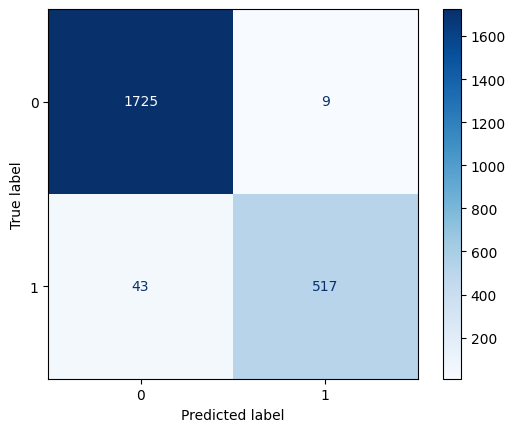

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [38]:
# Get the feature importance from the model
coefficients = model.coef_.flatten()

# Get the feature names (the terms from the TF-IDF vectorizer)
features = vectorizer.get_feature_names_out()

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': coefficients
})

# Sort the features by their absolute importance (coefficients)
feature_importance['abs_importance'] = feature_importance['importance'].abs()
feature_importance = feature_importance.sort_values(by='abs_importance', ascending=False)

# Display the top 10 most important features
print(feature_importance.head(20))

         feature  importance  abs_importance
4532      thanks   -5.324070        5.324070
2295        http    4.873127        4.873127
1640         edu   -4.822734        4.822734
3685          ra    4.269415        4.269415
4749         use   -3.732315        3.732315
776        board   -3.682443        3.682443
4973       wrote   -3.506038        3.506038
1547        does   -3.302036        3.302036
2717        list   -3.300271        3.300271
1087         com    3.201612        3.201612
2181  handyboard   -3.195584        3.195584
1            000    3.081886        3.081886
4756       using   -2.964023        2.964023
1111     company    2.876386        2.876386
3923       robot   -2.836361        2.836361
2202          hb   -2.817252        2.817252
4660         try    2.795099        2.795099
4715  university   -2.794609        2.794609
3562     problem   -2.633563        2.633563
2294        html   -2.592719        2.592719


/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_82151/1321513406.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


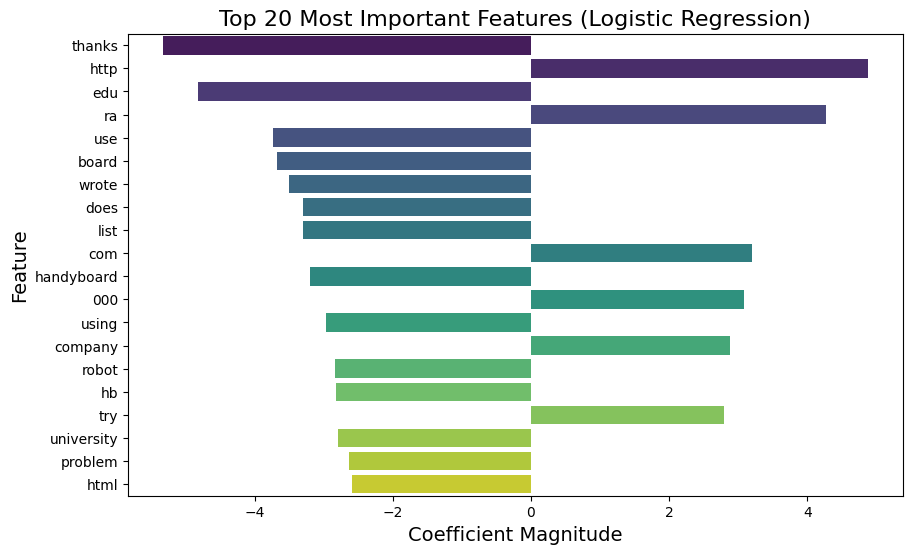

In [40]:
# Plot the top 10 most important features
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 features
top_features = feature_importance.head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')

# Add titles and labels
plt.title('Top 20 Most Important Features (Logistic Regression)', fontsize=16)
plt.xlabel('Coefficient Magnitude', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

To gain further insight:

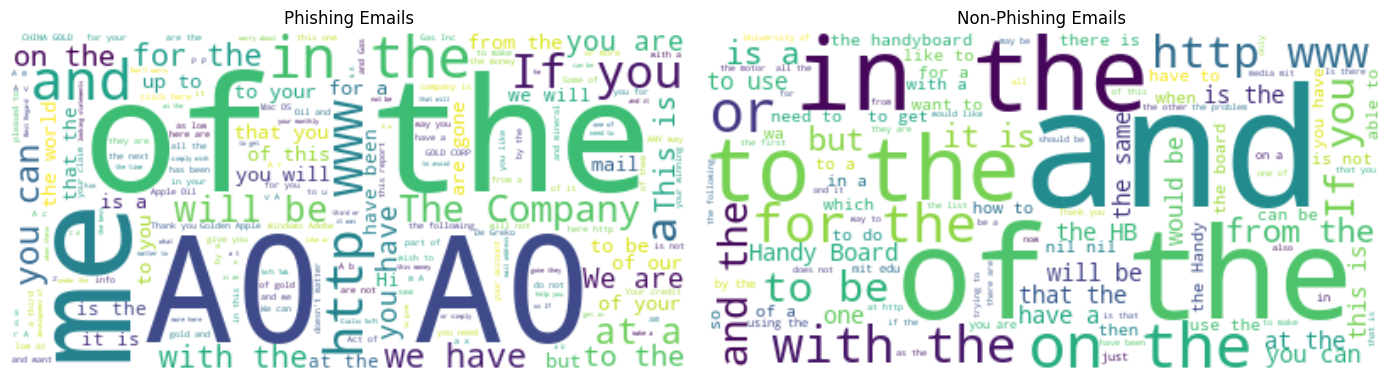

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate phishing and non-phishing emails
phishing_emails = data[data['label'] == 1]['body'].dropna()
non_phishing_emails = data[data['label'] == 0]['body'].dropna()

# Combine all text from phishing and non-phishing emails
phishing_text = ' '.join(phishing_emails)
non_phishing_text = ' '.join(non_phishing_emails)

# Generate word clouds
phishing_wordcloud = WordCloud(stopwords='english', background_color='white').generate(phishing_text)
non_phishing_wordcloud = WordCloud(stopwords='english', background_color='white').generate(non_phishing_text)

# Plot the word clouds
plt.figure(figsize=(14, 7))

# Phishing Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(phishing_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Phishing Emails')

# Non-Phishing Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(non_phishing_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Phishing Emails')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Separate phishing and non-phishing emails
phishing_emails = data[data['label'] == 1]['body'].dropna()
non_phishing_emails = data[data['label'] == 0]['body'].dropna()

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)

# Fit and transform bigrams for phishing emails
X_phishing = vectorizer.fit_transform(phishing_emails)
phishing_ngrams = vectorizer.get_feature_names_out()
phishing_counts = X_phishing.sum(axis=0).A1
phishing_ngrams_df = pd.DataFrame(phishing_counts, index=phishing_ngrams, columns=['count'])
phishing_ngrams_df = phishing_ngrams_df.sort_values(by='count', ascending=False)

# Fit and transform bigrams for non-phishing emails
X_non_phishing = vectorizer.transform(non_phishing_emails)
non_phishing_ngrams = vectorizer.get_feature_names_out()
non_phishing_counts = X_non_phishing.sum(axis=0).A1
non_phishing_ngrams_df = pd.DataFrame(non_phishing_counts, index=non_phishing_ngrams, columns=['count'])
non_phishing_ngrams_df = non_phishing_ngrams_df.sort_values(by='count', ascending=False)

# Display the top 20 frequent bigrams for phishing and non-phishing
print("Top 20 Frequent Bigrams in Phishing Emails:")
print(phishing_ngrams_df.head(20))

print("\nTop 20 Frequent Bigrams in Non-Phishing Emails:")
print(non_phishing_ngrams_df.head(20))

Top 20 Frequent Bigrams in Phishing Emails:
              count
a0 a0          1115
http www        715
000 00          375
59 95           263
golden apple    224
oil gas         223
000 000         212
69 95           200
ra http         197
ra te           182
hi ra           177
gold corp       176
china gold      174
00 low          160
apple oil       160
http 62         150
49 95           148
62 193          147
225 122         147
193 225         147

Top 20 Frequent Bigrams in Non-Phishing Emails:
              count
http www       2793
000 000          43
00 low            4
000 00            3
oil gas           2
49 95             1
gold corp         0
ra http           0
http 62           0
hi ra             0
golden apple      0
apple oil         0
china gold        0
a0 a0             0
69 95             0
62 193            0
59 95             0
225 122           0
193 225           0
ra te             0


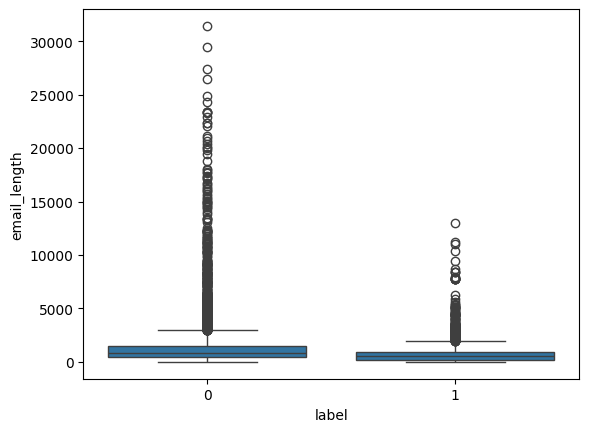

In [17]:
data['email_length'] = data['body'].apply(len)
sns.boxplot(x='label', y='email_length', data=data)
plt.show()

In [21]:
import string
import pandas as pd

# Separate phishing and non-phishing emails
phishing_emails = data[data['label'] == 1]['body'].dropna()
non_phishing_emails = data[data['label'] == 0]['body'].dropna()

# Function to count the proportions of character categories in text
def count_char_proportions(text):
    total_chars = len(text)  # Total number of characters in the text
    if total_chars == 0:
        return {
            'lowercase': 0,
            'uppercase': 0,
            'digits': 0,
            'special_characters': 0,
            'whitespace': 0
        }

    char_counts = {
        'lowercase': 0,
        'uppercase': 0,
        'digits': 0,
        'special_characters': 0,
        'whitespace': 0
    }
    
    # Iterate through each character in the text and classify
    for char in text:
        if char in string.ascii_lowercase:
            char_counts['lowercase'] += 1
        elif char in string.ascii_uppercase:
            char_counts['uppercase'] += 1
        elif char in string.digits:
            char_counts['digits'] += 1
        elif char in string.punctuation:
            char_counts['special_characters'] += 1
        elif char in string.whitespace:
            char_counts['whitespace'] += 1
    
    # Calculate proportions
    proportions = {key: value / total_chars for key, value in char_counts.items()}
    return proportions

# Count character proportions in phishing and non-phishing emails
phishing_char_proportions = phishing_emails.apply(count_char_proportions)
non_phishing_char_proportions = non_phishing_emails.apply(count_char_proportions)

# Aggregate proportions for phishing and non-phishing emails (averaging over all emails)
phishing_avg_proportions = pd.DataFrame(phishing_char_proportions.tolist()).mean()
non_phishing_avg_proportions = pd.DataFrame(non_phishing_char_proportions.tolist()).mean()

# Display the results
print("Average Character Proportions in Phishing Emails:")
print(phishing_avg_proportions)

print("\nAverage Character Proportions in Non-Phishing Emails:")
print(non_phishing_avg_proportions)

Average Character Proportions in Phishing Emails:
lowercase             0.639038
uppercase             0.053239
digits                0.024063
special_characters    0.050069
whitespace            0.198587
dtype: float64

Average Character Proportions in Non-Phishing Emails:
lowercase             0.648216
uppercase             0.046894
digits                0.021145
special_characters    0.077806
whitespace            0.205444
dtype: float64


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 624 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 287 kB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 11.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


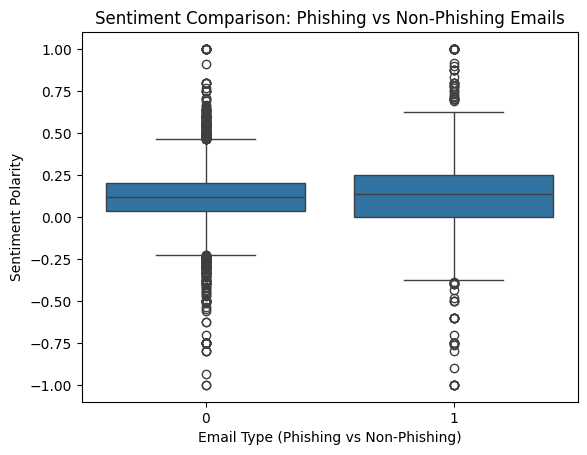

In [ ]:
#%pip install textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate sentiment polarity for each email body
data['sentiment'] = data['body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Create a boxplot to compare sentiment between phishing and non-phishing emails
sns.boxplot(x='label', y='sentiment', data=data)
plt.title('Sentiment Comparison: Phishing vs Non-Phishing Emails')
plt.xlabel('Email Type (Phishing vs Non-Phishing)')
plt.ylabel('Sentiment Polarity')
plt.show()